<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/PROJETO_Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*.

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://img.freepik.com/fotos-gratis/risco-oportunidade-de-jogo-swot-fraqueza-conceito-incerto_53876-122989.jpg?t=st=1711485712~exp=1711489312~hmac=0014d8b3468cc51a9744e1ecf48e00c0461e484c1f5a64268ed44746125d1795&w=996" width="70%">
</p>


## Contextualização do Problema
Neste problema, o objetivo é desenvolver um modelo que preveja a probabilidade de um cliente não cumprir com suas obrigações financeiras e deixar de pagar a fatura do Cartão de Crédito. O objetivo é criar um modelo que reduza as perdas financeiras do banco, ao mesmo tempo em que minimiza os casos de falsos positivos.

Planejo utilizar a moderna biblioteca Pycaret para a criação do modelo de classificação. Esta biblioteca testa vários modelos e entrega os melhores resultados, além de realizar o ajuste dos hiperparâmetros.


In [ ]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q
!pip install --upgrade PyCaret

In [2]:
# Import required libraries
import pandas as pd
from pycaret.classification import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt



## Análise exploratória:



In [3]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

In [4]:
df.shape

(45000, 43)

In [5]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [6]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [7]:
df['target_default'].mean()

0.15957931051005006

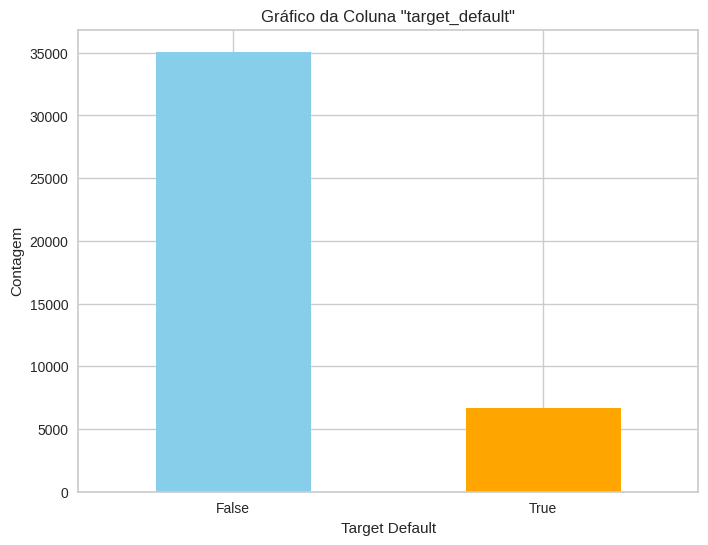

In [8]:
#Gráfico de barras
plt.figure(figsize=(8, 6))
df['target_default'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gráfico da Coluna "target_default"')
plt.xlabel('Target Default')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

Como podem ver, a nossa variável alvo (target_default) está desbalanceada; teremos que prestar atenção nisso no modelo de Machine Learning

In [9]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Várias características, como 'target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year', têm mais de metade dos dados ausentes.

As características 'external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues' possuem entre 25-34% de seus dados faltantes.

A variável alvo target_default contém valores nulos que serão removidos do conjunto de dados.

No contexto deste projeto, a situação mais extrema (target_fraud) não é problemática, pois é uma variável alvo que não é relevante para a análise de risco de inadimplência. Entretanto, as outras características devem ser tratadas com cautela.

In [10]:
print(df.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Existem alguns valores que não são muito úteis para o modelo de aprendizado de máquina, como o profile_phone_number, que possui 45 mil valores diferentes, além das variáveis external_data_provider_credit_checks_last_2_year e channel, que possuem apenas um valor. Vou deletá-las e substituir os valores ausentes das outras variáveis.

Não vou me preocupar com outliers e métodos como SMOTE, pois a biblioteca de Machine Learning que utilizarei (Pycaret) já realiza esse processo.

In [11]:
from sklearn.impute import SimpleImputer
df_tratado = df.copy()

# substituir inf por nan em reported_income
df_tratado['reported_income'] = df_tratado['reported_income'].replace(np.inf,
                                                                  np.nan)

# descartar as colunas ids, target_fraud,
# external_data_provider_credit_checks_last_2_year e channel
df_tratado.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)

#  substituir -999 em external_data_provider_email_seen_before por NaN
df_tratado.loc[df_tratado['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# elminar colunas sem informação aparente ou que demandam mais pesquisa
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_tratado.drop(labels=drop_var, axis=1, inplace=True)

# elminar as entradas onde target_default é NaN
df_tratado.dropna(subset=['target_default'], inplace=True)

num_df = df_tratado.select_dtypes(exclude='object').columns
cat_df = df_tratado.select_dtypes(include='object').columns

# substituição de valores ausentes
df_tratado.last_amount_borrowed.fillna(value=0, inplace=True)
df_tratado.last_borrowed_in_months.fillna(value=0, inplace=True)
df_tratado.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_tratado.loc[:,num_df])
df_tratado.loc[:,num_df] = imputer.transform(df_tratado.loc[:,num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_tratado.loc[:,cat_df])
df_tratado.loc[:,cat_df] = imputer.transform(df_tratado.loc[:,cat_df])

In [12]:
df_tratado.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

## Modelo de Machine Learning

Agora que os dados estão devidamente tratados, vou iniciar a criação do modelo. Como mencionado anteriormente, utilizarei a biblioteca Pycaret para este problema. Esta é uma biblioteca moderna que automatiza vários processos, além de fornecer uma comparação entre diversos modelos de acordo com o seu objetivo.

In [13]:
from pycaret.classification import *

# Carregar os dados
data = df_tratado

# Configurar o ambiente PyCaret
clf = setup(data, target='target_default', session_id=123,
            normalize=True,                  # Normalizar features numéricas
            normalize_method='robust',       # Usar normalização robusta
            remove_outliers=True,            # Remover outliers
            outliers_threshold=0.05,         # Threshold para definir outliers
            remove_multicollinearity=True,
            fix_imbalance=True)

# Compare diferentes modelos
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target_default
2,Target type,Binary
3,Original data shape,"(41741, 26)"
4,Transformed data shape,"(59495, 36)"
5,Transformed train set shape,"(46972, 36)"
6,Transformed test set shape,"(12523, 36)"
7,Numeric features,20
8,Categorical features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8416,0.0000,0.0851,0.5256,0.1461,0.1063,0.1621,5.5280
dummy,Dummy Classifier,0.8404,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3290
rf,Random Forest Classifier,0.8381,0.0000,0.0665,0.4512,0.1158,0.0780,0.1234,13.1770
gbc,Gradient Boosting Classifier,0.8379,0.0000,0.0986,0.4648,0.1623,0.1128,0.1556,27.0600
et,Extra Trees Classifier,0.8353,0.0000,0.0941,0.4278,0.1540,0.1025,0.1395,8.0300
xgboost,Extreme Gradient Boosting,0.8339,0.0000,0.1203,0.4273,0.1876,0.1265,0.1585,2.7770
ada,Ada Boost Classifier,0.8191,0.0000,0.1876,0.3718,0.2484,0.1581,0.1706,6.6730
dt,Decision Tree Classifier,0.7339,0.0000,0.2569,0.2174,0.2354,0.0757,0.0761,2.3240
ridge,Ridge Classifier,0.6801,0.0000,0.5720,0.2661,0.3632,0.1859,0.2102,1.3920
lda,Linear Discriminant Analysis,0.6800,0.0000,0.5720,0.2661,0.3631,0.1858,0.2102,1.4700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

O método Light Gradient Boosting Machine teve o melhor resultado, com cerca de 84% de acurácia; agora vou tunar os hiperparâmetros

In [14]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8422,0.0000,0.0644,0.5455,0.1152,0.0843,0.1460
1,0.8385,0.0000,0.0665,0.4559,0.1161,0.0787,0.1250
2,0.8433,0.0000,0.0687,0.5714,0.1226,0.0915,0.1573
3,0.8361,0.0000,0.0365,0.3617,0.0663,0.0382,0.0706
4,0.8405,0.0000,0.0773,0.5000,0.1338,0.0952,0.1478
5,0.8419,0.0000,0.0493,0.5610,0.0906,0.0665,0.1306
6,0.8385,0.0000,0.0642,0.4615,0.1128,0.0767,0.1242
7,0.8392,0.0000,0.0621,0.4754,0.1098,0.0757,0.1258
8,0.8442,0.0000,0.0665,0.6078,0.1199,0.0913,0.1632


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


O modelo com os hiperparâmetros ajustados teve um desempenho ligeiramente inferior em todos os parâmetros em comparação com o modelo original, então utilizarei o modelo normal.

In [ ]:
save_model(best_model, 'modelo_treinado')

In [ ]:
evaluate_model(best_model)

Estas foram as características que mais impactaram o modelo de regressão. É possível observar que o escore da pessoa (representado por score_2) tem uma forte correlação com a inadimplência. Além disso, podemos levantar a hipotese que pessoas que possivelmente têm conta em mais de um banco (external_data_provider_email_seen_before) também têm maior probabilidade de inadimplência. A renda também está correlacionada com este fenômeno (income).
<p align=center>
  <img src="https://i.ibb.co/6Zp0YSd/variaveis-importantes.png" width="100%">
</p>

## Conclusão:
Este projeto utilizou a biblioteca PyCaret para desenvolver um modelo de aprendizado de máquina capaz de prever o risco de inadimplência de clientes em relação ao pagamento de faturas de cartão de crédito.

A parte mais trabalhosa do projeto foi, sem dúvida, o tratamento dos dados. O conjunto de dados estava bastante desbalanceado e com várias featurescom muitos valores ausentes. Portanto, este trabalho foi imprescindível para o bom funcionamento do modelo de classificação.

Através da análise dos recursos mais importantes, identificou-se que o escore de crédito, o histórico de contas em múltiplos bancos e a renda são fatores fortemente correlacionados com a inadimplência.

O modelo final, selecionado e otimizado pelo PyCaret, alcançou resultados promissores na classificação dos clientes inadimplentes.Este projeto demonstrou o poder da biblioteca PyCaret para criação e otimização de modelos de aprendizado de máquina, fornecendo insights valiosos para mitigação de riscos e perdas financeiras decorrentes da inadimplência.
